<a href="https://www.kaggle.com/code/ssathishkumar/icc-test-cricket-runs-eda?scriptVersionId=95119208" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#Import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import time
import seaborn as sns
import re
import math
import PIL
import urllib
sns.set_style("whitegrid")
#sns.set(style="darkgrid")
sns.set_palette("tab10")
import IPython
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
import datetime as dt
plt.style.use('seaborn-notebook')
params = {'legend.fontsize': 15,
          'legend.title_fontsize': 16,
          'figure.figsize': (15, 5),
         'axes.labelsize': 18,
         'axes.titlesize':20,
         'xtick.labelsize':18,
         'ytick.labelsize':18}
plt.rcParams.update(params)
img_fmt = 'svg'
plot_no = 0

In [2]:
df = pd.read_csv('/kaggle/input/icc-test-cricket-runs/ICC Test Batting Figures.csv',encoding= 'unicode_escape')
df.head()
df.info()
df.describe().T

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile
0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14,http://stats.espncricinfo.com/ci/content/playe...
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17,http://stats.espncricinfo.com/ci/content/playe...
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,http://stats.espncricinfo.com/ci/content/playe...
3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8,http://stats.espncricinfo.com/ci/content/playe...
4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9,http://stats.espncricinfo.com/ci/content/playe...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Player          3001 non-null   object
 1   Span            3001 non-null   object
 2   Mat             3001 non-null   int64 
 3   Inn             3001 non-null   object
 4   NO              3001 non-null   object
 5   Runs            3001 non-null   object
 6   HS              3001 non-null   object
 7   Avg             3001 non-null   object
 8   100             3001 non-null   object
 9   50              3001 non-null   object
 10  0               3001 non-null   object
 11  Player Profile  3001 non-null   object
dtypes: int64(1), object(11)
memory usage: 281.5+ KB


,count,mean,std,min,25%,50%,75%,max
Mat,3001.0,17.427191,24.954654,1.0,2.0,7.0,21.0,200.0


In [3]:
df.replace(to_replace='-',inplace=True)
df[["Mat", "Avg","Inn","Runs","100"]] = df[["Mat", "Avg","Inn","Runs","100"]].apply(pd.to_numeric)

Player            None
Span              None
Mat               None
Inn               None
NO                None
Runs              None
HS                None
Avg               None
100               None
50                None
0                 None
Player Profile    None
dtype: object

Top 20 players who has the best average sorted by their run aggregate

In [4]:
df[['Player', 'Country']] = df['Player'].str.split('(', 1, expand=True)
#remove 'ICC' from country
df.Country = df.Country.apply(lambda x: x.split(')')[0].replace('ICC/',''))

<AxesSubplot:title={'center':'Players with best batting average ordered by their run aggregate'}, xlabel='Player', ylabel='Runs'>

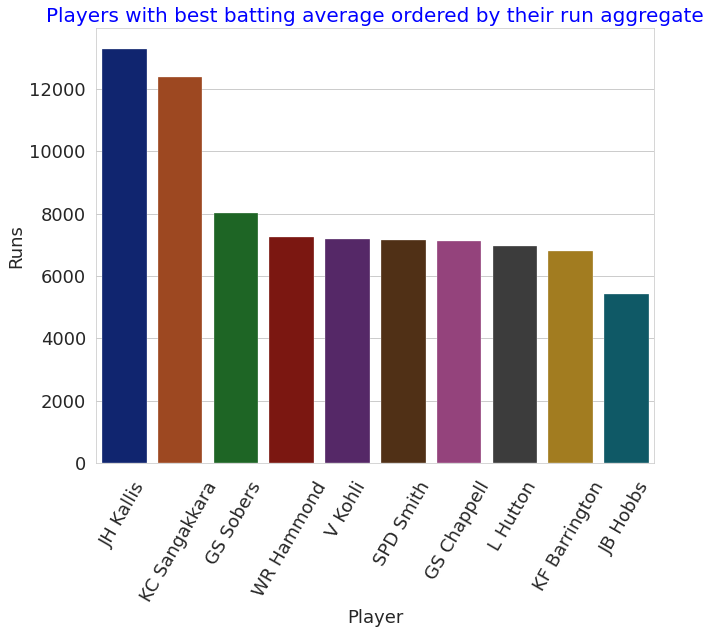

In [5]:
#filter the players who played 100+ matches and sort out the top n players with best average
df1 = df.query('Inn > 100').sort_values(by='Avg',ascending=False).head(10).sort_values(by='Runs',ascending=False)
_ = plt.subplots(figsize = (10,8))
_ = plt.xticks(rotation = 60)
_ = plt.title('Players with best batting average ordered by their run aggregate', color='blue', fontsize=20)
sns.barplot(data = df1, x='Player',y = 'Runs', palette='dark')
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

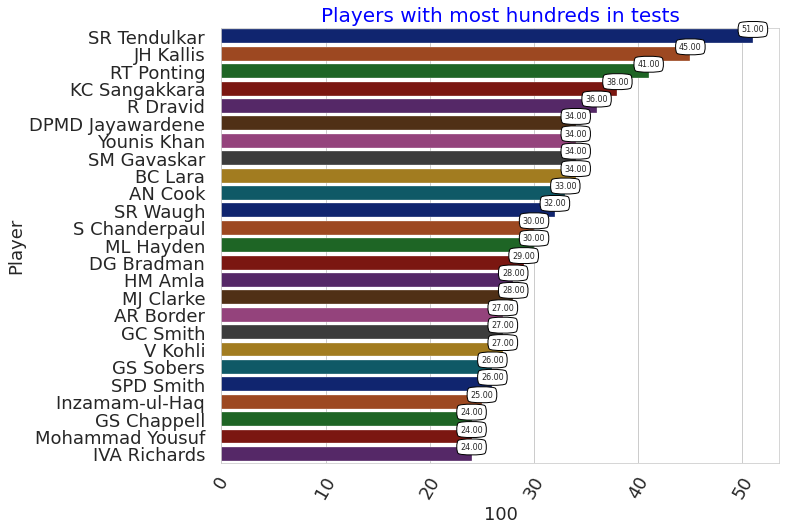

In [6]:
#filter the players who played 100+ matches and sort out the top n players with best average
df2 = df.sort_values(by='100',ascending=False).head(25)
_ = plt.subplots(figsize = (10,8))
_ = plt.xticks(rotation = 60)
_ = plt.title('Players with most hundreds in tests', color='blue', fontsize=20)
plots = sns.barplot(data = df2, y='Player',x = '100', palette='dark')
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_width(), '.2f'), 
                   (bar.get_width(),bar.get_y())
                       , ha='center', va='center',
                   size=8, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.5", fc="w", ec="black", lw=1),
                   textcoords='offset points')
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

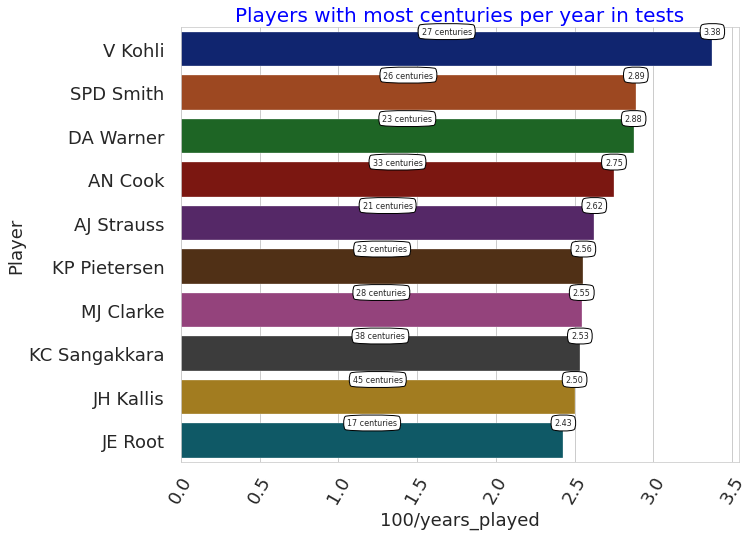

In [7]:
#average number of hundreds scored in a year
df['years_played'] = df.Span.apply(lambda x: abs(eval(x)))
pd.set_option('mode.chained_assignment', None)
df3 = df[df['100']>10]
df3['100/years_played'] = df3.apply(lambda x: x['100']/x.years_played, axis = 1)
df3 = df3.sort_values(by = '100/years_played', ascending = False).head(10)
_ = plt.subplots(figsize = (10,8))
_ = plt.xticks(rotation = 60)
_ = plt.title('Players with most centuries per year in tests', color='blue', fontsize=20)
plots = sns.barplot(data = df3, y='Player',x = '100/years_played', palette='dark')
i = 0
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_width(), '.2f'), 
                   (bar.get_width(),bar.get_y())
                       , ha='center', va='center',
                   size=8, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.5", fc="w", ec="black", lw=1),
                   textcoords='offset points')
    _ = plots.annotate(str(df3.iloc[i,]['100'])+' centuries', 
                   (bar.get_width()/2,bar.get_y())
                       , ha='center', va='center',
                   size=8, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.5", fc="w", ec="black", lw=1),
                   textcoords='offset points')
    i+=1
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1